In [10]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt




In [11]:
# Total population, N.
N = 10000000
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 1, 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0


In [12]:
#r0 is reproductive number or strength of virus
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
gamma = 1./14


Reproductive Number=0.600000


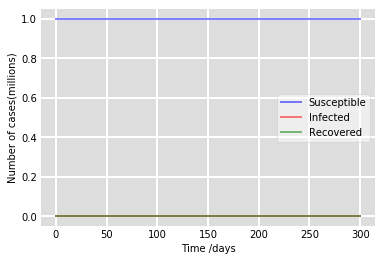

Reproductive Number=0.800000


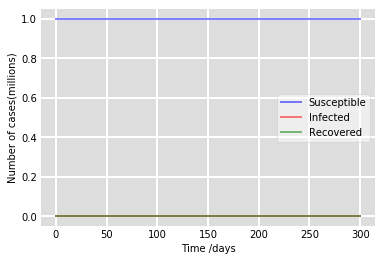

Reproductive Number=1.000000


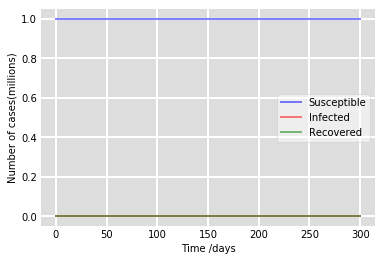

Reproductive Number=1.200000


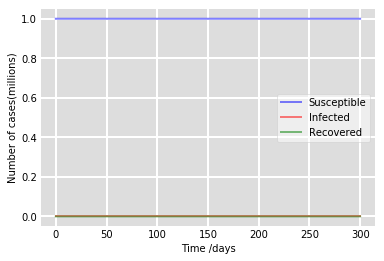

Reproductive Number=1.400000


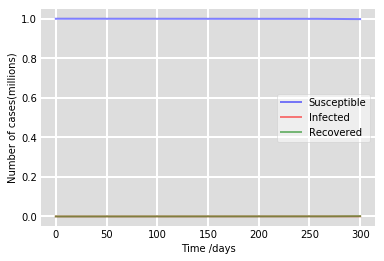

Reproductive Number=1.600000


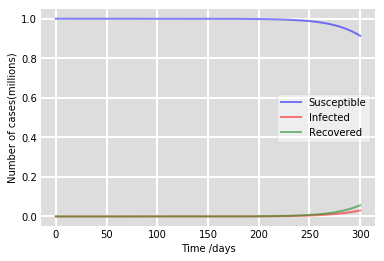

Reproductive Number=1.800000


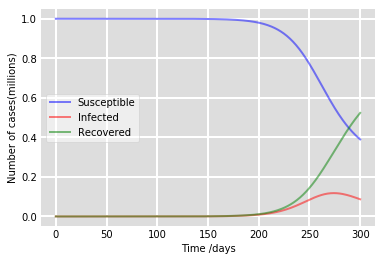

Reproductive Number=2.000000


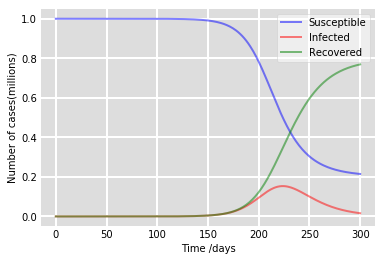

Reproductive Number=2.200000


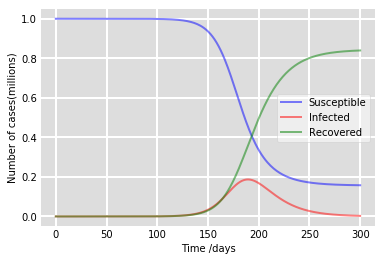

Reproductive Number=2.400000


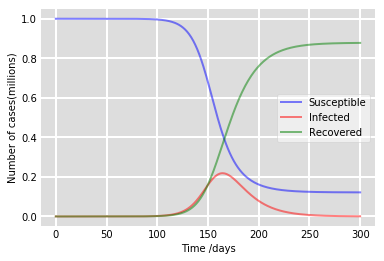

Reproductive Number=2.600000


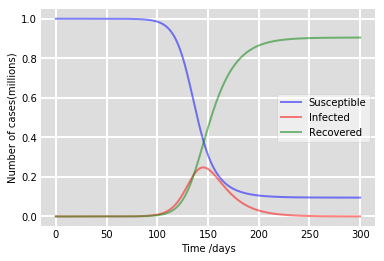

Reproductive Number=2.800000


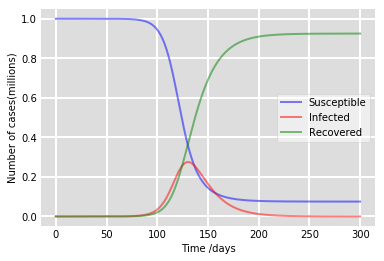

Reproductive Number=3.000000


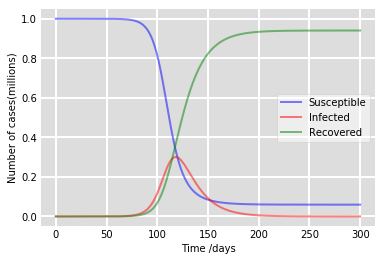

Reproductive Number=3.200000


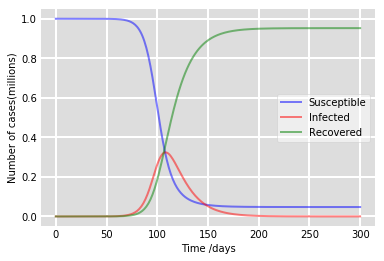

Reproductive Number=3.400000


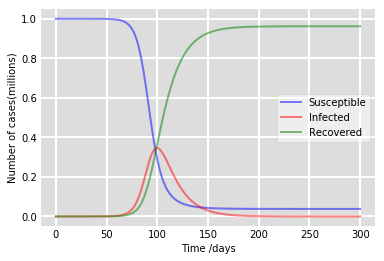

Reproductive Number=3.600000


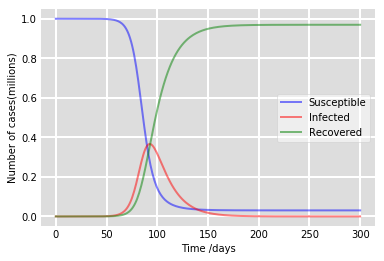

Reproductive Number=3.800000


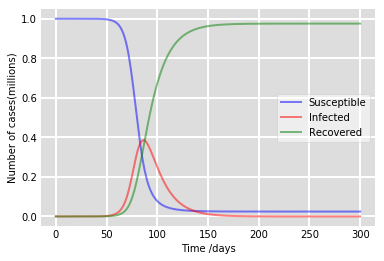

Reproductive Number=4.000000


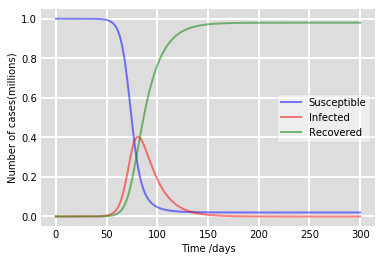

Reproductive Number=4.200000


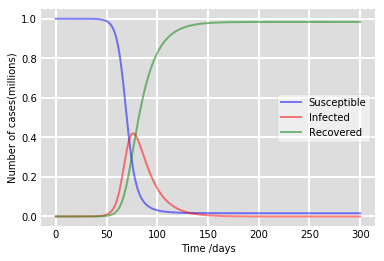

Reproductive Number=4.400000


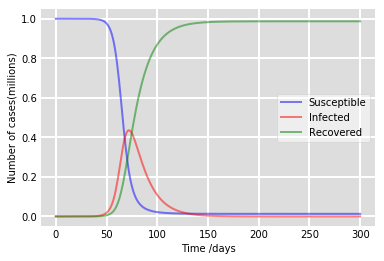

Reproductive Number=4.600000


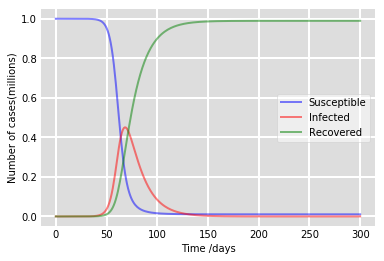

Reproductive Number=4.800000


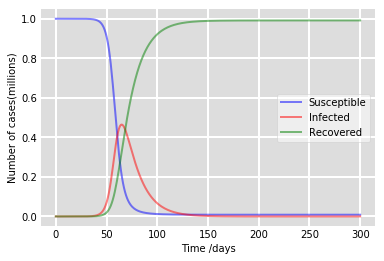

Reproductive Number=5.000000


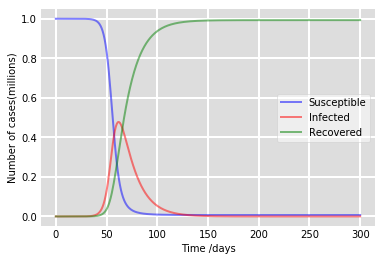

Reproductive Number=5.200000


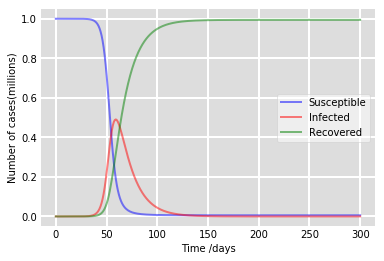

Reproductive Number=5.400000


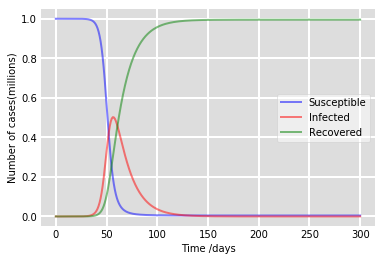

Reproductive Number=5.600000


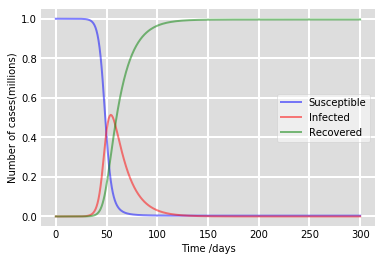

Reproductive Number=5.800000


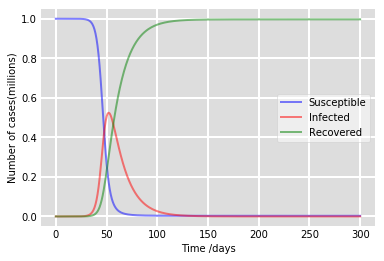

Reproductive Number=6.000000


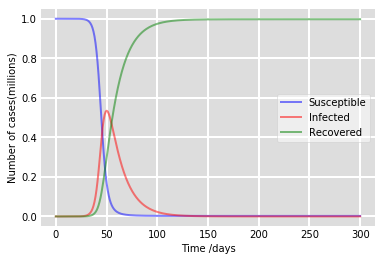

Reproductive Number=6.200000


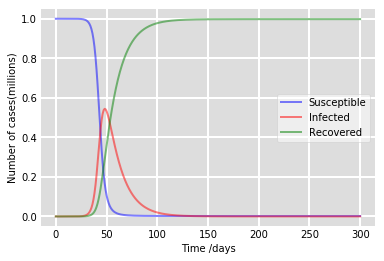

Reproductive Number=6.400000


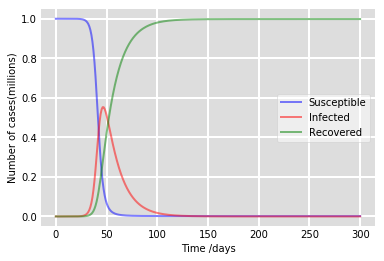

Reproductive Number=6.600000


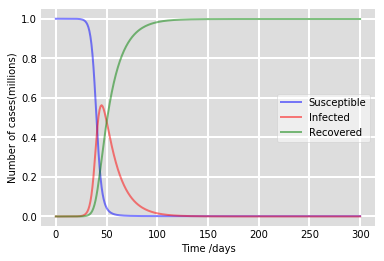

Reproductive Number=6.800000


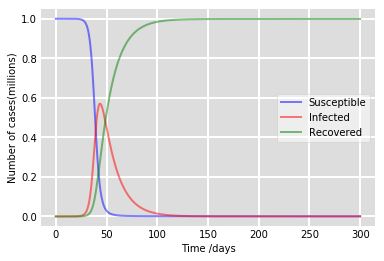

Reproductive Number=7.000000


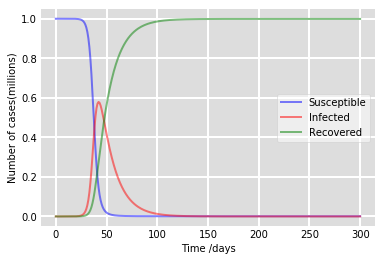

In [13]:
for r0 in np.arange(0.6,7.2,0.2):
    beta = r0*gamma
    print("Reproductive Number=%f"%r0)
    # A grid of time points (in days)
    t = np.linspace(0, 300, 300)

    # The SIR model differential equations.
    def deriv(y, t, N, beta, gamma):
        S, I, R = y
        dSdt = -(beta * S * I )/ N
        dIdt = (beta * S * I)/ N - (gamma * I)
        dRdt = gamma * I
        return dSdt, dIdt, dRdt

    # Initial conditions vector
    y0 = S0, I0, R0
    # Integrate the SIR equations over the time grid, t.
    ret = odeint(deriv, y0, t, args=(N, beta, gamma))
    S, I, R = ret.T


    # Plot the data on three separate curves for S(t), I(t) and R(t)
    fig = plt.figure(facecolor='w')
    ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
    ax.plot(t, S/N, 'b', alpha=0.5, lw=2, label='Susceptible')
    ax.plot(t, I/N, 'r', alpha=0.5, lw=2, label='Infected')
    ax.plot(t, R/N, 'g', alpha=0.5, lw=2, label='Recovered')
    ax.set_xlabel('Time /days')
    ax.set_ylabel('Number of cases(millions)')
    #ax.set_ylim(0,1.0)
    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)
    ax.grid(b=True, which='major', c='w', lw=2, ls='-')
    legend = ax.legend()
    legend.get_frame().set_alpha(0.5)
    for spine in ('top', 'right', 'bottom', 'left'):
        ax.spines[spine].set_visible(False)
    plt.show()